In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_parquet('../data/all_data_preprocessed/all_merged.parquet')

In [3]:
X = df.drop(columns=['event_all_region'])
y = df['event_all_region']

In [4]:
tscv = TimeSeriesSplit(n_splits=5)
splits = list(tscv.split(X))

In [5]:
train_idx, test_idx = splits[-1]
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
y_pred_lin = lin_reg.predict(X_test_scaled)

In [13]:
mse = mean_squared_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lin)

In [14]:
mse

0.18811836790317563

In [15]:
rmse

np.float64(0.4337261439009362)

In [16]:
r2

0.052902883640324694

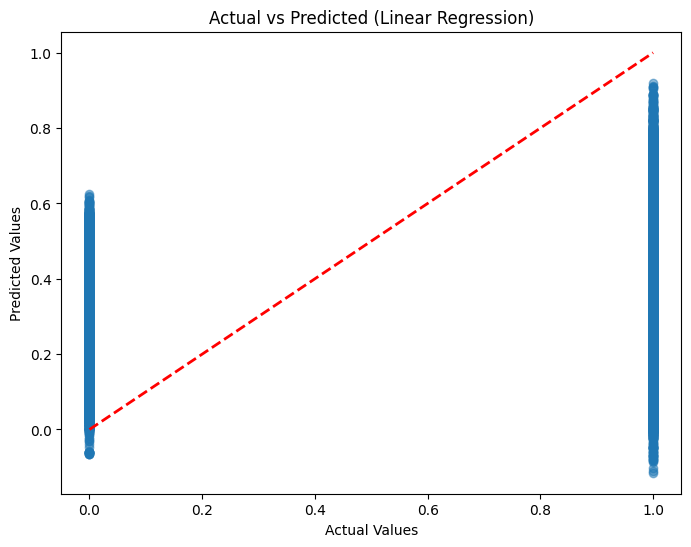

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()